<a href="https://colab.research.google.com/github/jjcrofts77/Advanced-Calculus-MATH20471/blob/main/content/notebooks/Part1/Chapter1/IBVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Initial and Boundary Value Problems (IBVP)

Consider a second-order ordinary differential equation (ODE)
 
$$
x'' = f(t,x,x') 
$$

where $ x'=\mathrm{d}x/\mathrm{d}t $ and $ x''=\mathrm{d}^2x/\mathrm{d}t^2 $. The problem is to find $x(t)$ subject to appropriate additional information.

Familiar examples of such equations include

$$
 \frac{\mathrm{d}^2 x}{\mathrm{d}t^2} &= \sin{t}\\
 \frac{\mathrm{d}^2 x}{\mathrm{d}t^2} &= -3\frac{\mathrm{d} x}{\mathrm{d}t} - 2x 
$$

## Initial-value problem (IVP)
Suppose $x(0)$ and $x'(0)$ (or more generally $x(t_0)$ and $x'(t_0)$) are prescribed. Consider the second-order differential equation 

$$
x''(t) = \mu(1-x^2(t))x'(t) - x(t),\quad t\geq 0
$$ (VanDerPol)

for a function $x(t)$, with initial data

$$
 x(0) = x_0,~ x'(0) = \nu_0.
$$

Here $\mu, x_0, \nu_0$ are constants. 

Because we specify sufficient conditions at an initial time $t=0$ ($t=t_0$) to fix the solution, this is called an *initial value problem* (IVP).

Note that the example given above is the famed *Van der Pol equation*, which was originally proposed by the Dutch electrical engineer Balthasar 
van der Pol to model oscillations observed in certain types of electrical circuits. It is an example of a *nonlinear differential equation* and importantly does 
not admit an analytic solution. (It can however be analysed both numerically and by using the methods of dynamical systems -- see (take?) the third year module 
*Numerical Analysis and Dynamical Systems* for more details!)

Below, we use numerical methods, such as those you are currently learning about in *Numerical Methods for ODEs* module, to solve the Van der Pol Equation in {eq}`VanDerPol`

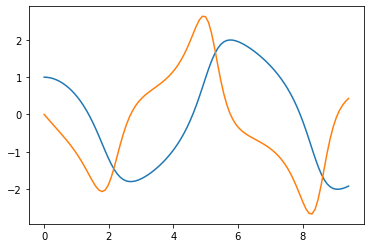

In [3]:
# Van der Pol - numerical solution 

# load packages for integrating ODEs and plotting solutions
import numpy as np # matlab-like commands 
import matplotlib.pyplot as plt # plotting tools
from scipy.integrate import odeint # ode solver

# RHS of the Van der Pol ODE (written as a first order system - see NMODEs!)

def rhs(Y,t,mu):
  y,ydot=Y
  return ydot, mu*(1-y**2)*ydot-y

t = np.linspace(0,3*np.pi,101) # integration interval
y0 = [1, 0] # initial condition
mu = 1
y_arr = odeint(rhs,y0,t,args=(mu,))
y,ydot = y_arr[:,0],y_arr[:,1]
plt.ion()
plt.plot(t,y,t,ydot)

## Boundary value problem (BVP)
Suppose $x(t)$ is defined on an interval $\displaystyle [a, b]$ and $\displaystyle x(a) = A$ and $\displaystyle x(b) = B$ are prescribed. Consider, for example, the linear equation

$$
x''(t) = \mu^2 x(t), ~~0 < t < 1,\quad \text{with}\quad x(0) = A,~~ x(1) = B.
$$

Such equations are called *two-point boundary value problems*.

In the simple case given above, we can solve in the usual way to obtain solutions

$$
 x_1(t) = e^{\mu t} \quad\text{and}\quad x_2(t) = e^{-\mu t}. 
$$

Linearity then implies that the general solution is 

$$
x(t) &= C_1x_1(t) + C_2x_2(t)\\
&= C_1e^{\mu t} + C_2e^{-\mu t},
$$ 

where $C_1$ and $C_2$ are constants. 

All that remains in order to solve our BVP is to determine for which values of $\mu, C_1$ and $C_2$ the determined solution satisfies the boundary conditions. 


We shall return to this problem later on in the course, but it is worth noting that in general boundary value problems (BVPs) are much harder to solve than IVPs. (This follows due to their *global* as opposed to *local* nature.)

In [ ]:
# BVP - vibrating string problem

## Existence and uniquness
Note that solutions may not exist, or if they exist they may not be unique.

<br>

- **IVP:** $\displaystyle x''=6x^{1/3},~ x(0) = 0, x'(0)=0$ has solutions $x(t)=0$ and $\displaystyle x(t)=t^3$ and so uniqueness breaks down.

- **BVP1:** $\displaystyle x''+x=0,~ x(0)=1, x(2\pi)=0$ has no solution and so existence fails.

- **BVP2:** $\displaystyle x''+x=0,~ x(0)=x(2\pi)=0$ has infinitely many solutions, $\displaystyle x(t)=c\sin{t}$, where $c$ is an arbitrary constant (non-uniqueness).